# Heart Failure Prediction

# 🔎 Dataset Overview

## 💾 The data

The data comes from 'Heart Failure Prediction Dataset' from Kaggle, available in `'heart.csv'`.

#### Each row represents a single people:
- **`Age`** : age of the patient [years]
- **`Sex`** : sex of the patient [M: Male, F: Female]
- **`ChestPainType`** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **`RestingBP`** : resting blood pressure [mm Hg]
- **`Cholesterol`** : serum cholesterol [mm/dl]
- **`FastingBS`** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **`RestingECG`** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **`MaxHR`** : maximum heart rate achieved [Numeric value between 60 and 202]
- **`ExerciseAngina`** : exercise-induced angina [Y: Yes, N: No]
- **`Oldpeak`** : oldpeak = ST [Numeric value measured in depression]
- **`ST_Slope`** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **`HeartDisease`** : output class [1: heart disease, 0: Normal]


## Classification: Which demographic, clinical, and exercise-related features are the most significant predictors of heart disease?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import seaborn as sns

In [2]:
# Loading the Data
heart_df = pd.read_csv("../TeamProject/data/raw/heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Inspect the data
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# Cheking unique values in HeartDisease column
heart_df['HeartDisease'].unique()

array([0, 1])

In [5]:
# Checking Missing Values
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#Checking for duplicates 
heart_df.duplicated().sum()

0

##  Transform Categorical Variables

Transformation of categorical values ​​into numerical ones to work with machine learning models that require numerical inputs, such as KNN, which rely on distance calculations between data points.

| Feature | Type | Encoding Method | Why? |
|----------|----------|----------|----------|
| Sex   |Binary  | 0/1 Mapping   | Only Two Categories |
| ExerciseAngina   | Binary  | 0/1 Mapping  | Only two categories |
| ChestPainType   | Categorical  | One-Hot Encoding  | No meaningful order |
| RestingECG   | Categorical  | One-Hot Encoding  | No meaningful order |
| ST_Slope   | Ordered  | Ordinal Encoding  | Has a meaningful order |


In [7]:
# Sex (M, F) -> Convert to binary:
heart_df['Sex'] = heart_df['Sex'].map({'M': 1, 'F': 0})

In [8]:
# ChestPainType (TA, ATA, NAP, ASY)- categories with no meaninful order → Use One-Hot Encoding (creates separate binary columns (0 or 1) for each category):
heart_df = pd.get_dummies(heart_df, columns=['ChestPainType'], drop_first=True)

In [9]:
# RestingECG (Normal, ST, LVH) → One-Hot Encoding:
heart_df = pd.get_dummies(heart_df, columns=['RestingECG'], drop_first=True)

In [10]:
# ExerciseAngina (Y, N) → Binary Encoding:
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].map({'Y': 1, 'N': 0})

In [11]:
# ST_Slope - meaningful order: Up > Flat > Down → Ordinal Encoding (ordered categories):
slope_mapping = {'Up': 2, 'Flat': 1, 'Down': 0}
heart_df['ST_Slope'] = heart_df['ST_Slope'].map(slope_mapping)

In [12]:
heart_df.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,2,0,True,False,False,True,False
1,49,0,160,180,0,156,0,1.0,1,1,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,2,0,True,False,False,False,True
3,48,0,138,214,0,108,1,1.5,1,1,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,2,0,False,True,False,True,False
5,39,1,120,339,0,170,0,0.0,2,0,False,True,False,True,False
6,45,0,130,237,0,170,0,0.0,2,0,True,False,False,True,False
7,54,1,110,208,0,142,0,0.0,2,0,True,False,False,True,False
8,37,1,140,207,0,130,1,1.5,1,1,False,False,False,True,False
9,48,0,120,284,0,120,0,0.0,2,0,True,False,False,True,False


## Visualizing the data

The idea is to understand relationships and correlations between variables. By doing it we can gain insights into which features may contribute the most to predict a Heart Disease.

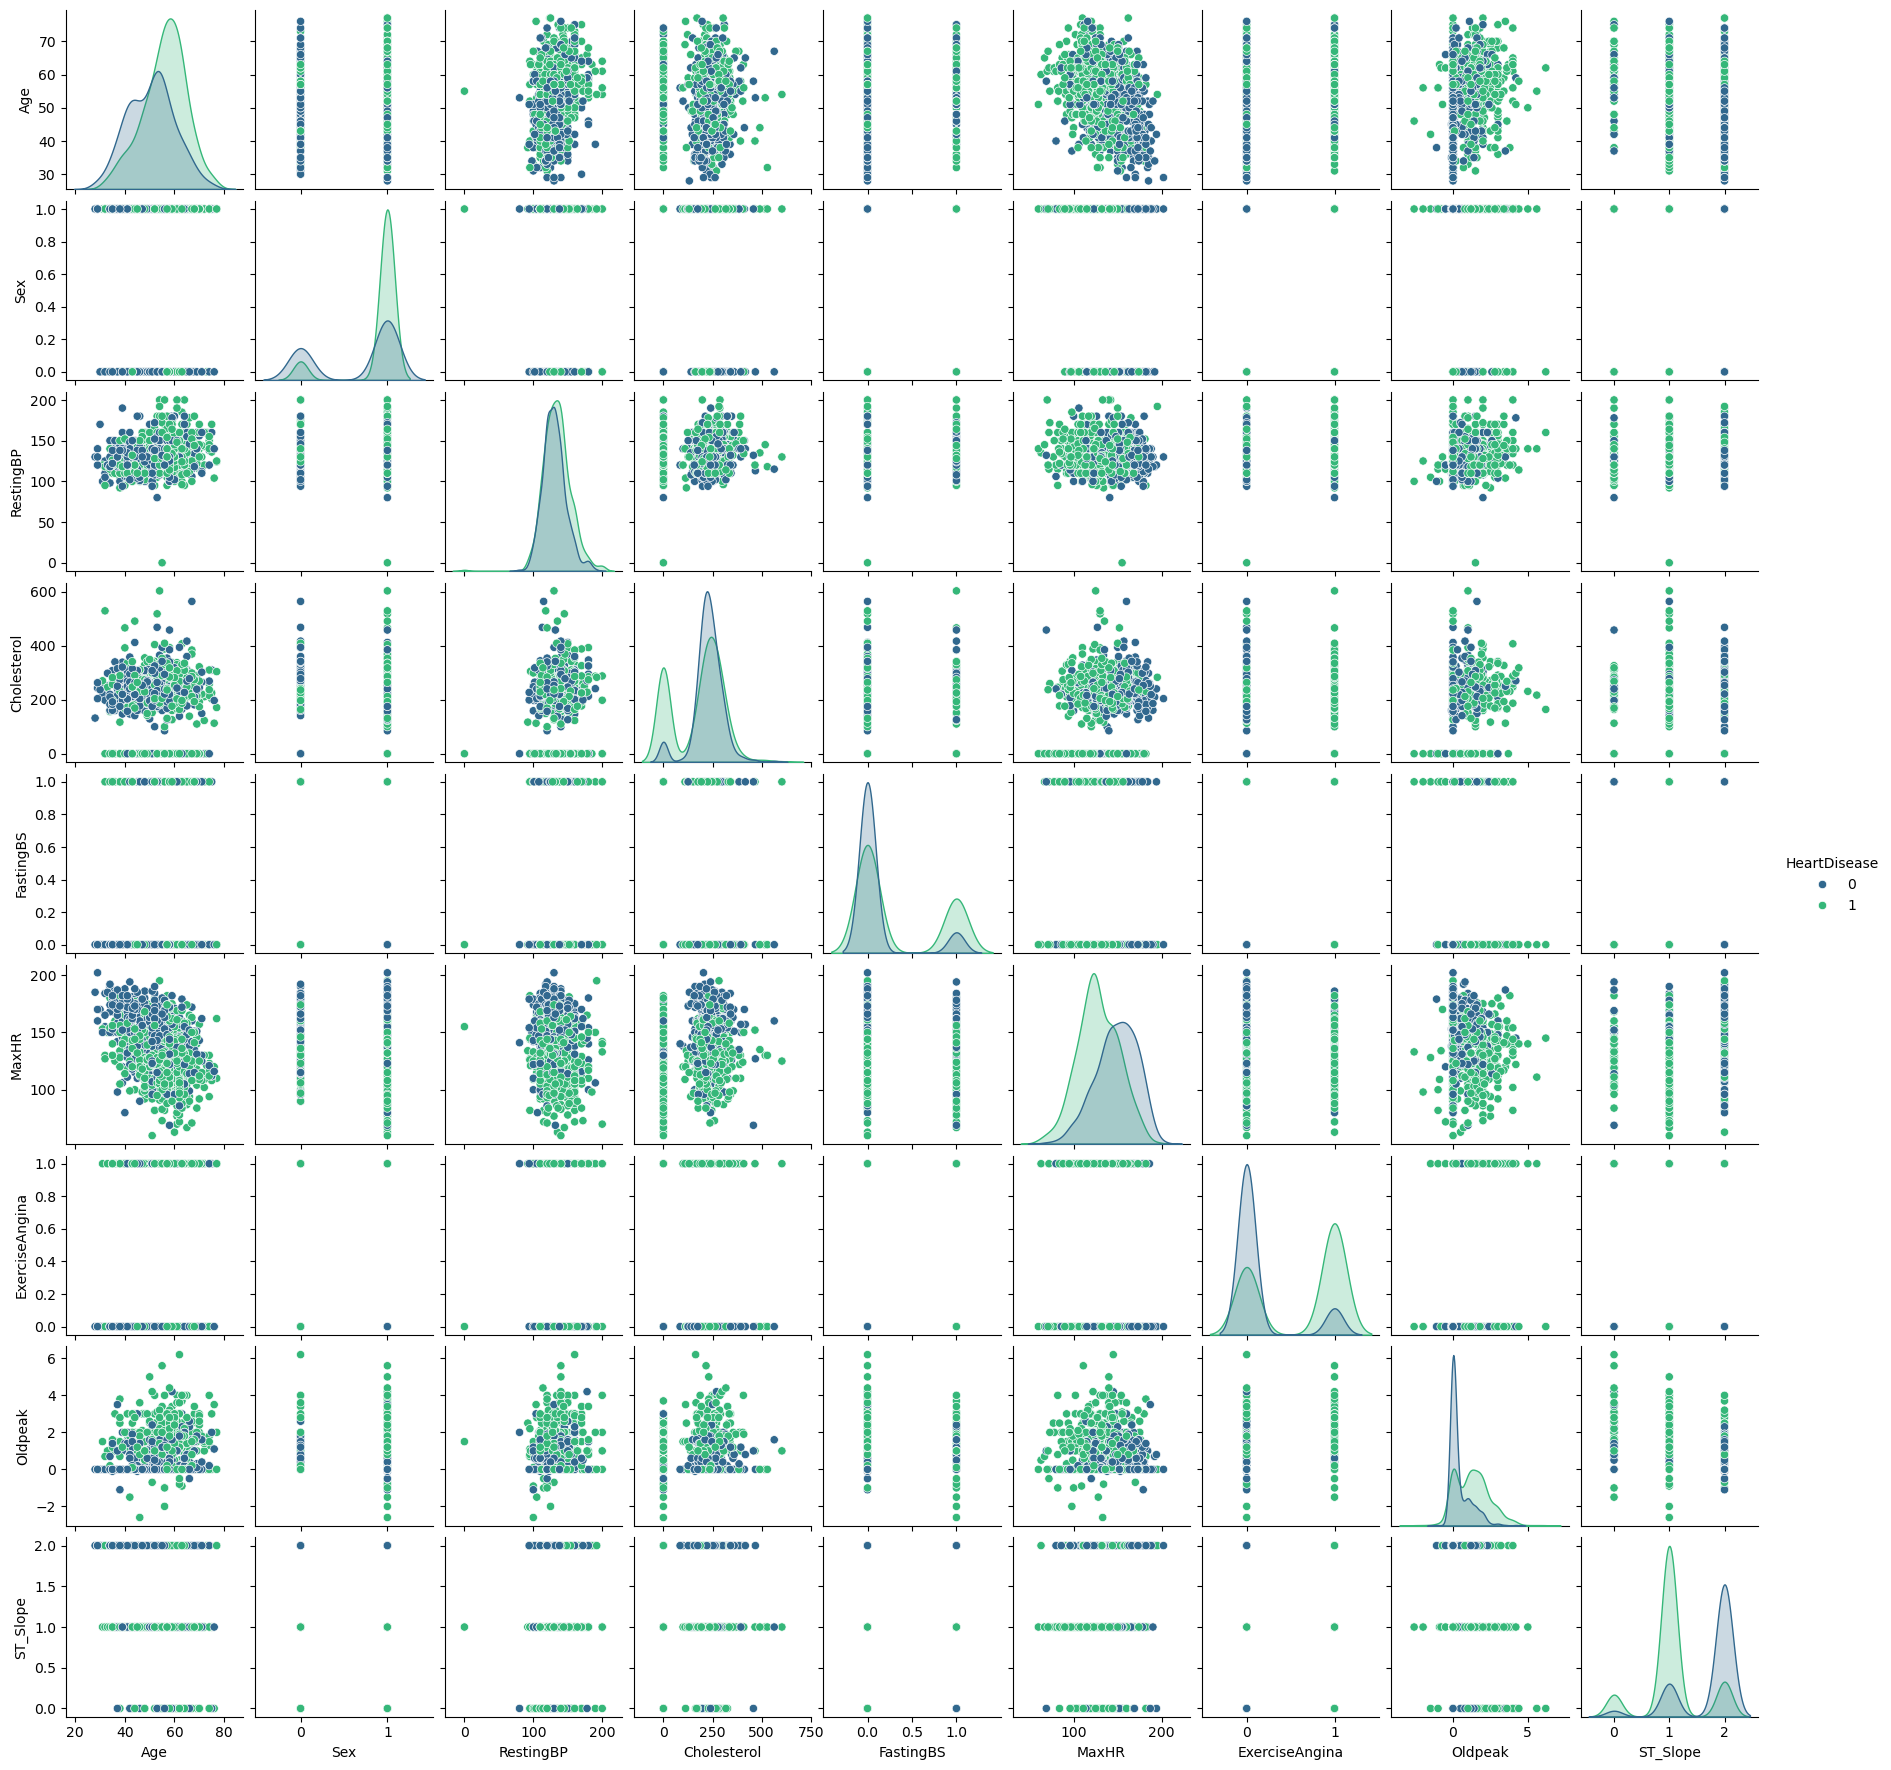

<Figure size 1500x1200 with 0 Axes>

In [13]:
# Select only numeric columns
numeric_features = heart_df.select_dtypes(include=['number']).columns

# Creates scatter plots for every combination of numerical features in the dataset
sns.pairplot(heart_df[numeric_features], hue="HeartDisease", diag_kind="kde", palette="viridis", height=2)
plt.figure(figsize=(15,12))
plt.show()


## StandardScaler in Scikit-Learn for continuous numerical features: Age, RestingBP, Cholesterol, MaxHR, Oldpeak

In [14]:
numerical_features = heart_df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(numerical_features)

# Create a new DataFrame with scaled features
scaled_heart_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Display the first few rows of the scaled DataFrame
print(scaled_heart_df.head())

        Age  RestingBP  Cholesterol     MaxHR   Oldpeak
0 -1.433140   0.410909     0.825070  1.382928 -0.832432
1 -0.478484   1.491752    -0.171961  0.754157  0.105664
2 -1.751359  -0.129513     0.770188 -1.525138 -0.832432
3 -0.584556   0.302825     0.139040 -1.132156  0.574711
4  0.051881   0.951331    -0.034755 -0.581981 -0.832432


In [16]:
categorical_features = heart_df.drop(columns=numerical_features)
categorical_features.head()

,Sex,FastingBS,ExerciseAngina,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,1,0,0,2,0,True,False,False,True,False
1,0,0,0,1,1,False,True,False,True,False
2,1,0,0,2,0,True,False,False,False,True
3,0,0,1,1,1,False,False,False,True,False
4,1,0,0,2,0,False,True,False,True,False


In [17]:
# Concatenate scaled numeric features with categorical features
scaled_heart_df = pd.concat([scaled_heart_df, categorical_features], axis=1)
scaled_heart_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ExerciseAngina,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,1,0,0,2,0,True,False,False,True,False
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,0,0,0,1,1,False,True,False,True,False
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,1,0,0,2,0,True,False,False,False,True
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,0,0,1,1,1,False,False,False,True,False
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,1,0,0,2,0,False,True,False,True,False


## Converting True/False to 0/1 to prevent errors in models

In [ ]:
scaled_heart_df[["ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA", "RestingECG_Normal", "RestingECG_ST"]]

,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,True,False,False,True,False
1,False,True,False,True,False
2,True,False,False,False,True
3,False,False,False,True,False
4,False,True,False,True,False
...,...,...,...,...,...
913,False,False,True,True,False
914,False,False,False,True,False
915,False,False,False,True,False
916,True,False,False,False,False


In [19]:
scaled_heart_df[["ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA", "RestingECG_Normal", "RestingECG_ST"]] = scaled_heart_df[["ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA", "RestingECG_Normal", "RestingECG_ST"]].astype(int)  # Convert True/False to 0/1
scaled_heart_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ExerciseAngina,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,1,0,0,2,0,1,0,0,1,0
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,0,0,0,1,1,0,1,0,1,0
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,1,0,0,2,0,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,0,0,1,1,1,0,0,0,1,0
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,1,0,0,2,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.188999,0.293283,1,0,0,1,1,0,0,1,1,0
914,1.536902,0.627078,-0.053049,0.164684,2.357094,1,1,0,1,1,0,0,0,1,0
915,0.370100,-0.129513,-0.620168,-0.857069,0.293283,1,0,1,1,1,0,0,0,1,0
916,0.370100,-0.129513,0.340275,1.461525,-0.832432,0,0,0,1,1,1,0,0,0,0
